Given each image 28 by 28 pixels, flatten into 784 and feed into neural net.
 

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:

import gzip
import sys
import _pickle as cPickle
 
f = open('../input/mnist-package/mnist.pkl', 'rb')
if sys.version_info < (3,):
    data = cPickle.load(f)
else:
    data = cPickle.load(f, encoding='bytes')
f.close()
(x_train, y_train), (x_test, y_test) = data





In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train[0].shape

(28, 28)

we can see that a single row is a 28 by 28 matrix 
(later we need to flatten this data)

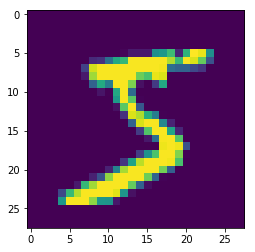

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

 in case of 3d space , we try to find a plane to sepearate the points 
 using SVM, the same approach can be used to classify the digits


In [6]:
#Fattening model
print(x_train.shape)
print(x_test.shape)
x_train  = x_train.reshape(60000,28,28,1) #depth of 1 is the grey scale 
x_test  = x_test.reshape(10000,28,28,1) #depth of 1 is the grey scale 
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
 #Encoding the y values because initially they will be in deicmal format
 print(y_train[0])
 y_train_enc = to_categorical(y_train)
 y_test_enc = to_categorical(y_test)
 print(y_train_enc[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#Model training
 
hist = model.fit(x_train,y_train_enc, validation_data=(x_test,y_test_enc),epochs=3)


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 94s 2ms/step - loss: 0.1948 - accuracy: 0.9517 - val_loss: 0.1017 - val_accuracy: 0.9721
Epoch 2/3
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0700 - accuracy: 0.9793 - val_loss: 0.0802 - val_accuracy: 0.9752
Epoch 3/3
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.0895 - val_accuracy: 0.9770


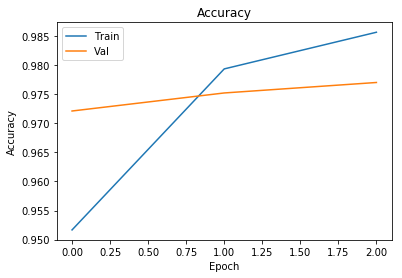

In [10]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [11]:
predictions = model.predict(x_test[:4])
predictions 

array([[5.1141424e-11, 2.0112736e-16, 4.7116608e-09, 4.0487964e-09,
        1.3615709e-16, 4.5693704e-14, 8.2905955e-19, 1.0000000e+00,
        1.4143187e-10, 2.3466817e-12],
       [4.4469289e-06, 1.7908515e-05, 9.9995291e-01, 9.0961031e-08,
        4.9186193e-11, 7.8829020e-15, 2.4657720e-05, 9.2485172e-11,
        3.6699443e-09, 4.3979204e-14],
       [8.8342695e-06, 9.9858582e-01, 1.0384931e-05, 9.0672742e-08,
        1.2795277e-03, 3.6145309e-07, 1.8530442e-06, 1.5380563e-07,
        1.1291161e-04, 1.1565224e-09],
       [1.0000000e+00, 7.2785224e-12, 5.6027083e-10, 1.2972763e-12,
        1.2535798e-12, 1.0475395e-11, 4.1198334e-09, 1.6789988e-12,
        1.0205480e-08, 1.8268484e-08]], dtype=float32)

In [12]:
#convert to digits for understanding
print(np.argmax(predictions, axis=1))
#print the actual labels
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


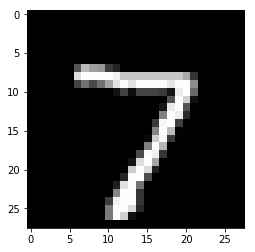

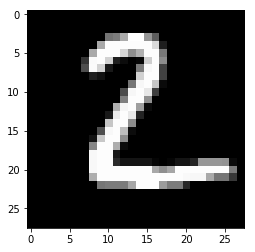

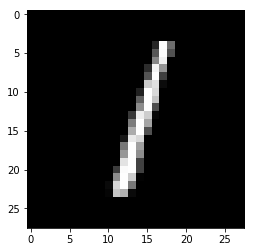

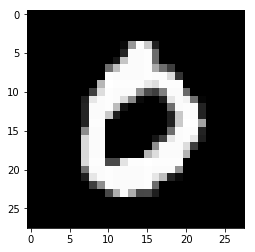

In [13]:
#displaying actual results as image
for i in range(0,4):
    image = x_test[i]
    img = np.array(image, dtype='float')
    pixels=image.reshape((28,28))
    plt.imshow(pixels,cmap='gray')
    plt.show()